# Evaluación Módulo 3 : Programa lealtad de una aerolínea

## 1.- EDA:Exploración inicial de los datos

## Liberías y carga de datos

In [1]:
# En primer lugar, importamos las librerías que nos harán falta, desde el soporte:

# Para tratamiento de datos

import pandas as pd 
import numpy as np 

# Procesos de imputación

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visuaicación de resultados

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 

In [2]:
# Carga de csv (1):

df_flight = pd.read_csv("files/Customer_Flight_Activity.csv")

df_flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [3]:
# Carga de csv (2) :

df_loyalty = pd.read_csv("files/Customer_Loyalty_History.csv")

df_loyalty.head(2)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


### EDA: Customer_Flight_Activity.csv

In [4]:
# Forma del conjunto de daro: (filas, columnas)

df_flight.shape

(405624, 10)

In [5]:
# Porcentaje de nulos por columna

df_flight.isna().sum()/df_flight.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [6]:
# Duplicados totales del conjunto de datos

df_flight.duplicated().sum()

np.int64(1864)

In [7]:
"""Muestra de duplicados del conjunto de datos, de la columna "Loyalty Number", que es la columna
que podría causar conflictos, ya que representa un identificador único"""

# Seguimos con el EDA, también del archivo: Customer_Loyalty_History.csv antes de tomar decisiones

df_flight[df_flight.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number").head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
169010,100018,2017,11,13,1,14,3374,337.0,0,0
135208,100018,2017,9,9,4,13,1651,165.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0


In [8]:
# Revisión de columnas

def revision_columnas(df):

    for c in df.columns:
        
        print(f"Valores únicos en la columna '{c}':\n{df[c].unique()}\n")


In [9]:
"""Aunque no todas las columnas requieren un análisis de valores únicos,
se aplica unique() de forma general mediante una función para mantener un
proceso uniforme y aprovechar la eficiencia del procesamiento en bloque."""

revision_columnas(df_flight)

Valores únicos en la columna 'Loyalty Number':
[100018 100102 100140 ... 999731 999788 999891]

Valores únicos en la columna 'Year':
[2017 2018]

Valores únicos en la columna 'Month':
[ 1  9  2  3 11  4  5  7  6  8 10 12]

Valores únicos en la columna 'Flights Booked':
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

Valores únicos en la columna 'Flights with Companions':
[ 0  4  7  1  6  3  5  2 10  8  9 11]

Valores únicos en la columna 'Total Flights':
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

Valores únicos en la columna 'Distance':
[1521 2030 1200 ... 1217  617 4135]

Valores únicos en la columna 'Points Accumulated':
[152.   203.   120.   ...  18.75 601.   626.  ]

Valores únicos en la columna 'Points Redeemed':
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 

In [10]:
df_flight.info()

# Los datos son de tipo "int" excepto puntos acumulados, que son de tipo float.
# La documentación no especifíca, que los puntos puedan ser con decimales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [11]:
# Podemos hacer una búsqueda de números decimales, o si son todos enteros, convertir a int (no hay nulos).

# OPCIONES: Con esta función, o haciendo un .sample() y a ojo.

def tiene_decimales_reales(columna):
    return ((columna %1)!= 0).sum()

#  columna %1 --> obtiene el residuo de dividir cada valor de la columna por 1
# y lo compara con que sea diferente a 0 con !=0
# sum() nos saca cuantos hay


In [12]:
tiene_decimales_reales(df_flight['Points Accumulated'])

# Sí, esto quiere decir que hay puntos acumulados fraccionados. Tipo: "23.5"

np.int64(20937)

### EDA: Customer_Loyalty_History.csv

In [13]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [14]:
df_loyalty.shape

(16737, 16)

In [15]:
# Tipo de dato

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [16]:
# Cancelation year y month, en formato float por presencia de NaN (que son floats)

# Para tratamiento de datos futuro, podemos convertir "Enrollment year/month" en DATE

# Creamos una nueva columna en formato datetime que combine mes y año, para posibles análisis futuros.

# Para que no genere conflictos, tenemos qu poner por defecto día 1 en todos. (Más información en la documentación)

df_loyalty['Enrollment Date'] =pd.to_datetime(df_loyalty['Enrollment Year'].astype(str) + '-' + df_loyalty['Enrollment Month'].astype(str) + '-01')

In [17]:
df_loyalty['Enrollment Date'].sample(3)

6780    2018-01-01
15360   2016-05-01
3       2013-02-01
Name: Enrollment Date, dtype: datetime64[ns]

In [18]:
# Porcentaje de nulos por columna

round(df_loyalty.isna().sum()/df_loyalty.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
Enrollment Date        0.00
dtype: float64

In [19]:
df_loyalty.duplicated().sum() # No tiene datos duplicados

np.int64(0)

In [20]:
# Aplicamos nuestra función de valores únicos: revision_columnas

revision_columnas(df_loyalty)

# Sólo son vuelos de Canadá


Valores únicos en la columna 'Loyalty Number':
[480934 549612 429460 ... 776187 906428 652627]

Valores únicos en la columna 'Country':
['Canada']

Valores únicos en la columna 'Province':
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Valores únicos en la columna 'City':
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

Valores únicos en la columna 'Postal Code':
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V

In [21]:
df_loyalty.describe(include="O").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


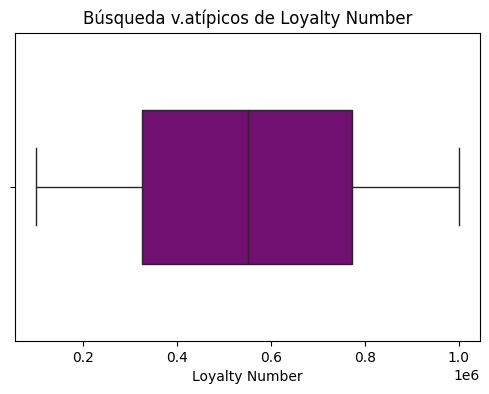

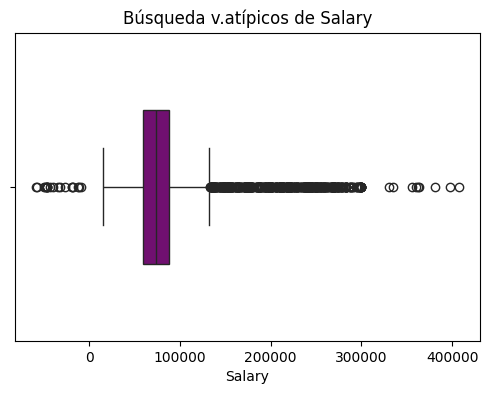

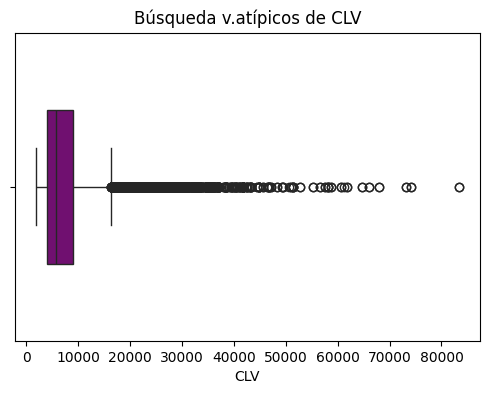

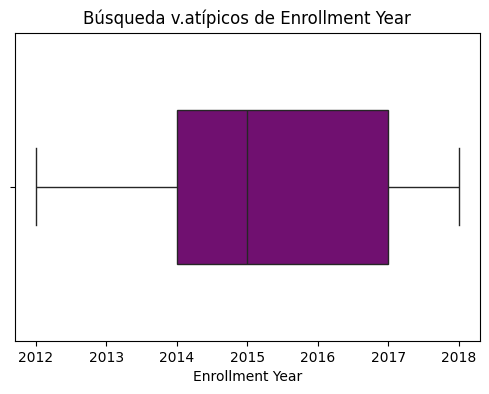

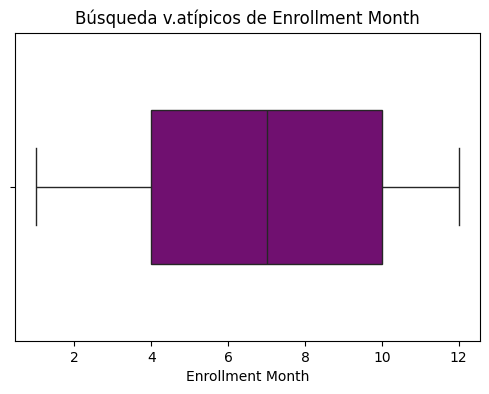

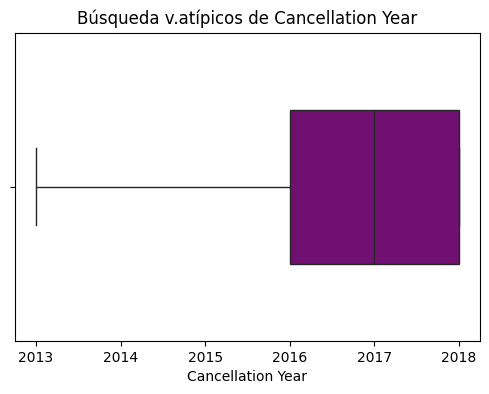

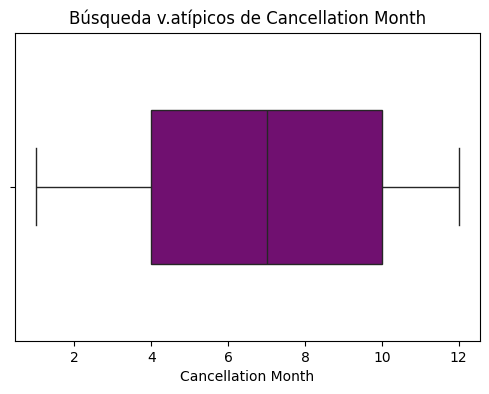

In [22]:
# Lista de columnas del DataFrame
columnas_numericas = df_loyalty.select_dtypes(include=['int64', 'float64']).columns

# Iterar sobre cada columna
for col in columnas_numericas:
        plt.figure(figsize=(6, 4)) 
        sns.boxplot(x=col, 
                    data=df_loyalty, 
                    width=0.5, 
                    color="purple")
        plt.title(f"Búsqueda v.atípicos de {col}")  
        plt.show()

# Encontramos bastantes valores atípicos en : salary y CLV
#CLV sin problema, porque son aportaciones que el cliente aporta a la empresa, puede ser alta.


In [23]:
min_salary, max_salary = df_loyalty['Salary'].min(), df_loyalty['Salary'].max()
print(f"Valor mínimo de Salary: {min_salary}")
print(f"Valor máximo de Salary: {max_salary}")

#Tranformación sobre valores negativos. Si podemos asumir salarios altos


Valor mínimo de Salary: -58486.0
Valor máximo de Salary: 407228.0


In [24]:
#Se establece un rango desde el rango inferior, hasta el extremo: 407228.0

Q1 = np.nanpercentile(df_loyalty["Salary"], 25)
Q3 = np.nanpercentile(df_loyalty["Salary"], 75)
IQR = Q3 - Q1
salto = IQR*1.5
bigote_izq = Q1 - salto
print(f"Rango inferior bigote izq --> {bigote_izq}")


Rango inferior bigote izq --> 15340.0


In [25]:
# Filtración datos desde ese valor, hasta el valor más alto.

df_loyalty_mod=df_loyalty[(df_loyalty["Salary"]>bigote_izq)]

In [26]:
# Valores:

min_salary, max_salary = df_loyalty_mod['Salary'].min(), df_loyalty_mod['Salary'].max()
print(f"Valor mínimo de Salary: {min_salary}")
print(f"Valor máximo de Salary: {max_salary}")

Valor mínimo de Salary: 15609.0
Valor máximo de Salary: 407228.0


In [27]:
round(df_loyalty_mod.isna().sum()/df_loyalty.shape[0]*100, 2)

# Al filtrar datos por salarios, tenemos nueva información sobre nulos.

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                 0.00
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     65.37
Cancellation Month    65.37
Enrollment Date        0.00
dtype: float64

In [28]:
# ¿Otra opción podría haber sido, convertir a nulos los valores atipicos negativos, y despues hacer una imputacion con la media?

In [29]:
# Relevancia de las columnas Cancellation Year, y Cancellation Month ante la gran proporción de nulos.
# Se valorará después de la unión, ya que en Customer Flight Analysis.csv, tenemos mas volumen de datos

In [30]:
#A partir de aquí trabajaremos con "df_loyalty_mod"
# Se guarda, para asegurar versiones en un futuro:

df_loyalty_mod.to_csv("files/MOD Customer Loyalty History.csv")

## Unión de conjunto de datos

In [ ]:
# Unión de tipo:
# Datos coincidentes de los datos "df_flight" con los datos de "df_loyalty_mod"

# Claro, porque en flight tenemos valores de id repetirdos, xq depende de la fecha, si lo
#hacemso al reves perdemos info.

In [32]:
df_airline = df_flight.merge(df_loyalty_mod, how='left', on='Loyalty Number') 

In [35]:
round(df_airline.isna().sum()/df_airline.shape[0]*100, 2)


Loyalty Number                  0.00
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
Country                        25.43
Province                       25.43
City                           25.43
Postal Code                    25.43
Gender                         25.43
Education                      25.43
Salary                         25.43
Marital Status                 25.43
Loyalty Card                   25.43
CLV                            25.43
Enrollment Type                25.43
Enrollment Year                25.43
Enrollment Month               25.43
Cancellation Year              90.79
Cancellation Month             90.79
Enrollment Date                25.43
dtype: float64

In [38]:
# Columnas a borrar: Cancellation Year y Cancellation Month

df_airline = df_airline.drop(['Cancellation Year', 'Cancellation Month'], axis=1)

In [ ]:
# En todas las columnas no coincidentes, tenemos un 25% de nulos aprox.

# S epuede busar la relación entre clv y loyalty card, que son
las columnas q mas nos interesan y quizás cambiar datos desde ahi.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Enrollment Date
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016.0,8.0,2016-08-01
1,100102,2017,1,10,4,14,2030,203.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,100140,2017,1,6,0,6,1200,120.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


C:\Users\isaw9\AppData\Local\Temp\ipykernel_1356\1175530334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Loyalty Card",


<Axes: xlabel='Loyalty Card', ylabel='CLV'>

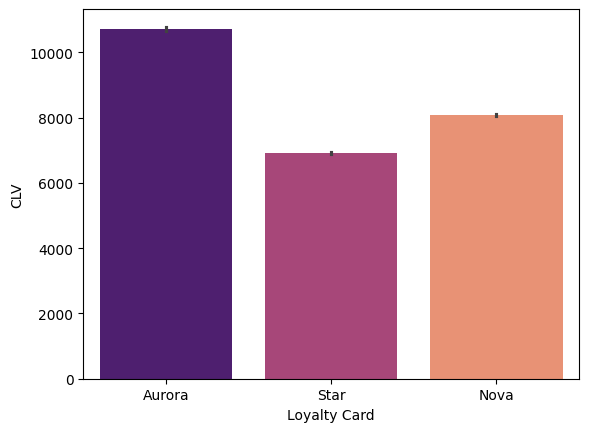

In [43]:
# 1 ¿Existe relación? --> Visualización

sns.barplot(x = "Loyalty Card", 
            y = "CLV", 
            data = df_airline, 
            palette = "magma")

In [ ]:
# No hay relación entre el dinero que cada cliente aporta a la empresa y la tarjeta de lealtad. No imputo.

VISUALIZACIONES

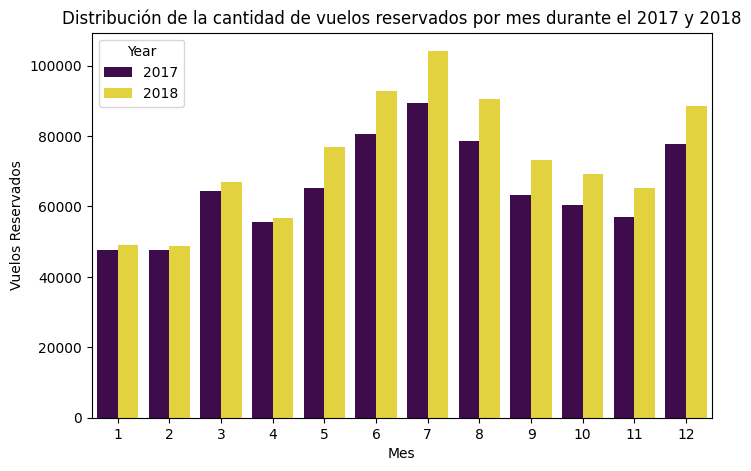

In [51]:
#1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Agrupar los datos por Año y Mes y sumar los vuelos reservados
df_flights_by_month = df_airline.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Creación de un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Flights Booked', data=df_flights_by_month, hue='Year', palette='viridis')


plt.title('Distribución de la cantidad de vuelos reservados por mes durante el 2017 y 2018')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.show()

In [ ]:
#2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.regplot(x='Distance', y='Points Accumulated', data=df_airline, color='purple')

# Configuración del gráfico
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia de los vuelos (en millas)')
plt.ylabel('Puntos acumulados')
plt.show()

In [ ]:
#3.¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
#4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
#5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
#6.¿Cómo se distribuyen los clientes según su estado civil y género?